In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
path="/content/drive/MyDrive/practical_dataset"

os.listdir(path)

['Kannada(new)',
 'Telugu(new)',
 'Marathi(new)',
 'Tamil(new)',
 'Bengali(new)',
 'Hindi(new)',
 'Malayalam(new)']

In [5]:
list_path=[
 'Kannada(new)',
 'Telugu(new)',
 'Marathi(new)',
 'Tamil(new)',
 'Bengali(new)',
 'Hindi(new)',
 'Malayalam(new)']
full_wav_files=[]
final_list=[]
for j in list_path:
  path_name=path+"/"+j
  # print(path_name)
  for k in os.listdir(path_name):

    final_list.append(k[0:3])
    full_wav_files.append(path_name+"/"+k)


In [6]:
import pandas as pd
df1=pd.DataFrame(final_list,columns=['Class'])
df2=pd.DataFrame(full_wav_files,columns=['Path'])

df3=pd.concat([df1,df2], axis=1)

In [7]:
df3

,Class,Path
0,kan,/content/drive/MyDrive/practical_dataset/Kanna...
1,kan,/content/drive/MyDrive/practical_dataset/Kanna...
2,kan,/content/drive/MyDrive/practical_dataset/Kanna...
3,kan,/content/drive/MyDrive/practical_dataset/Kanna...
4,kan,/content/drive/MyDrive/practical_dataset/Kanna...
...,...,...
115,mal,/content/drive/MyDrive/practical_dataset/Malay...
116,mal,/content/drive/MyDrive/practical_dataset/Malay...
117,mal,/content/drive/MyDrive/practical_dataset/Malay...
118,mal,/content/drive/MyDrive/practical_dataset/Malay...


In [8]:
df3.to_csv("/content/drive/MyDrive/small_dataset_list.csv")
spectro_direcvtory="/content/drive/MyDrive/spectrogram"

In [9]:
from tqdm import tqdm
import time
import glob
import os
from pathlib import Path
import librosa
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [10]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
spect="/content/drive/MyDrive/spectrogram/Kannada"

In [11]:
file1="ben_0001.wav"

# Train test split

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df3,df3['Class'],stratify = df3['Class'],test_size = 0.3,random_state = 0)
print(X_train['Class'].value_counts())
print(X_test['Class'].value_counts())

hin    14
mal    14
tam    14
mar    11
tel    11
kan    10
ben    10
Name: Class, dtype: int64
mal    6
tam    6
hin    6
kan    5
ben    5
tel    4
mar    4
Name: Class, dtype: int64


In [14]:
#Preparing images for model training --- image size = 256 x 256
train_batch = 64
test_batch = 64
RANDOM_SEED = 42
train_set= image_dataset_from_directory(spectro_direcvtory,
                                labels='inferred',
                                label_mode='categorical',
                                batch_size=train_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='training')

val_set =  image_dataset_from_directory(spectro_direcvtory,
                                labels='inferred',
                                label_mode='categorical',
                                batch_size=test_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='validation')

Found 120 files belonging to 7 classes.
Using 96 files for training.
Found 120 files belonging to 7 classes.
Using 24 files for validation.


In [15]:
test_ds_size = int(int(val_set.__len__()) * 0.5)
test_test_set = val_set.take(test_ds_size)
test_set = val_set.skip(test_ds_size)

# Sequential model

In [16]:
pip install livelossplot

In [17]:
from keras.layers import Conv2D,Flatten,Dense,AveragePooling2D, BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import keras
from livelossplot import PlotLossesKeras

In [18]:
model_1 = Sequential()

model_1.add(Conv2D(32,(3,3),input_shape=(256,256,3),activation='relu',padding='valid'))
model_1.add(BatchNormalization()),
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(16,(3,3),activation='relu'))
model_1.add(BatchNormalization()),
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model_1.add(Dense(32,activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model_1.add(Dense(7,activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Recall','Precision','AUC'])

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 16)     64        
 hNormalization)                                                 
                                                        

In [20]:
filepath = "/content/drive/MyDrive/Models/H-base-model-19.h5"

callbacks = [ModelCheckpoint(filepath=filepath, monitor="val_accuracy", mode='max', save_best_only=True),
            PlotLossesKeras()]

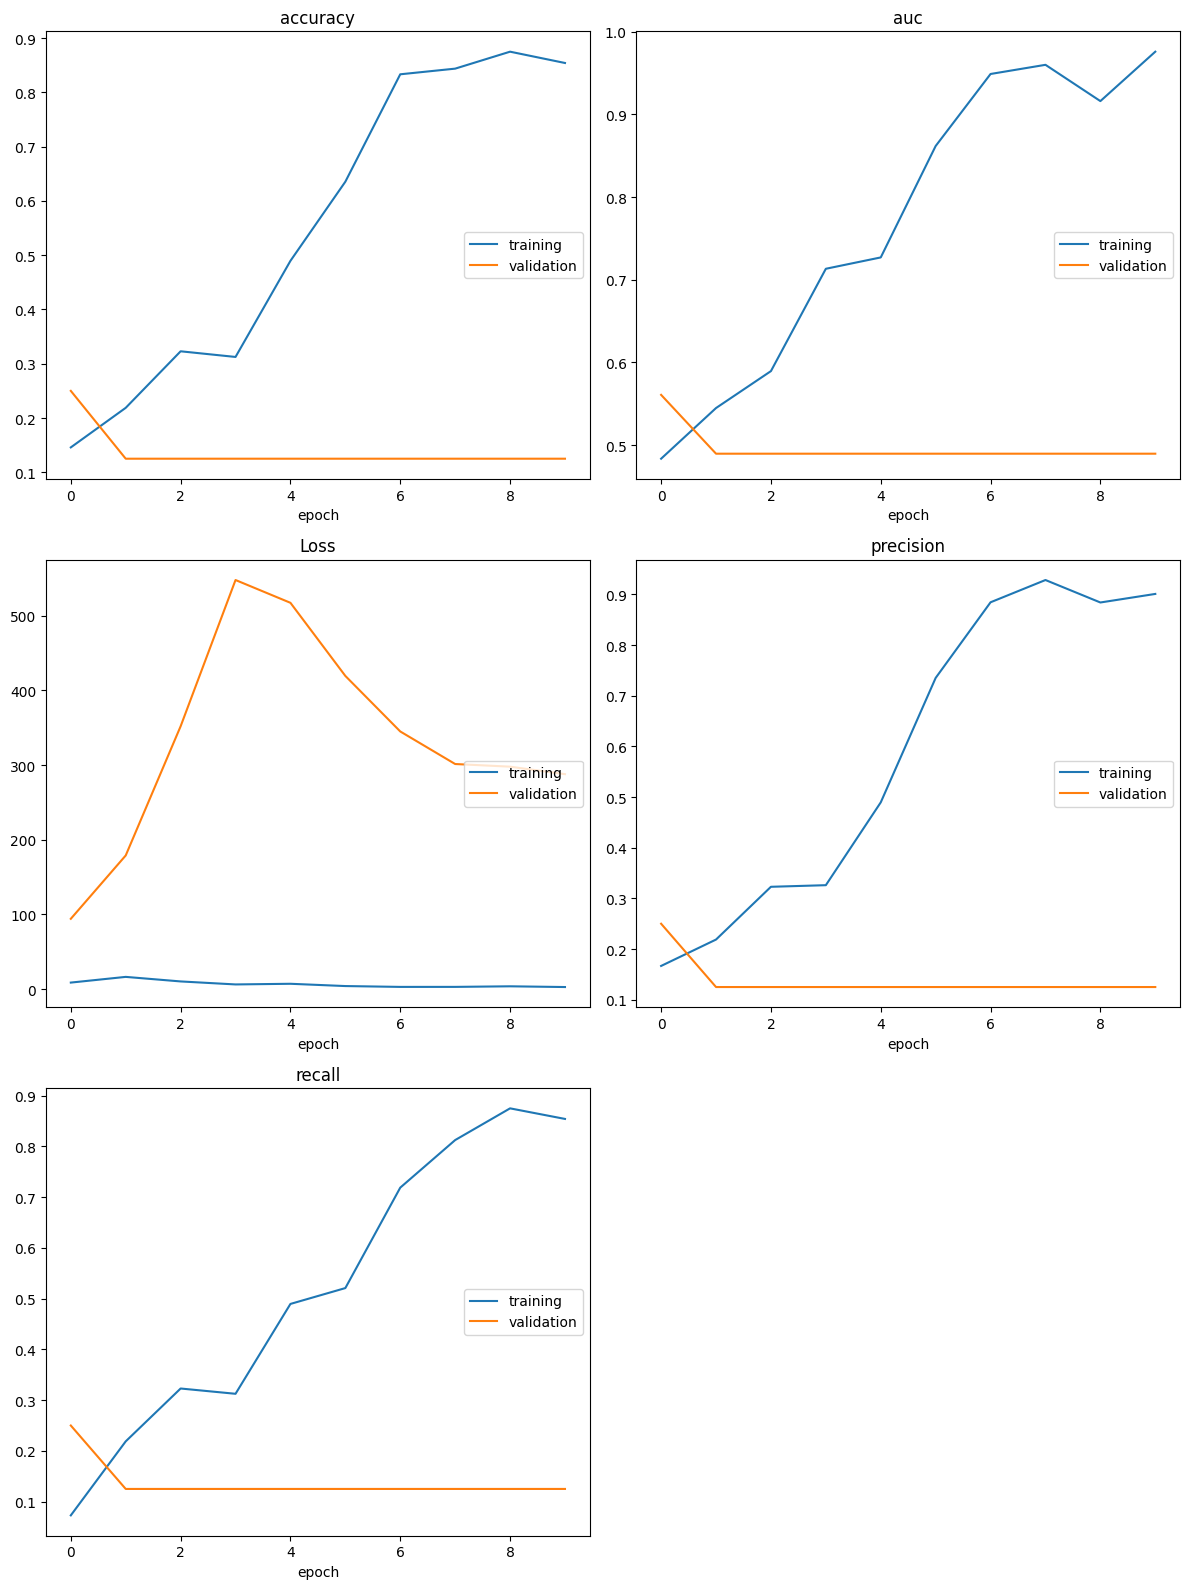

accuracy
	training         	 (min:    0.146, max:    0.875, cur:    0.854)
	validation       	 (min:    0.125, max:    0.250, cur:    0.125)
auc
	training         	 (min:    0.484, max:    0.976, cur:    0.976)
	validation       	 (min:    0.490, max:    0.561, cur:    0.490)
Loss
	training         	 (min:    2.743, max:   16.345, cur:    2.743)
	validation       	 (min:   94.143, max:  547.952, cur:  287.899)
precision
	training         	 (min:    0.167, max:    0.929, cur:    0.901)
	validation       	 (min:    0.125, max:    0.250, cur:    0.125)
recall
	training         	 (min:    0.073, max:    0.875, cur:    0.854)
	validation       	 (min:    0.125, max:    0.250, cur:    0.125)
2/2 [==============================] - 22s 6s/step - loss: 2.7429 - accuracy: 0.8542 - recall: 0.8542 - precision: 0.9011 - auc: 0.9759 - val_loss: 287.8986 - val_accuracy: 0.1250 - val_recall: 0.1250 - val_precision: 0.1250 - val_auc: 0.4896


In [21]:
h = model_1.fit(train_set,
                epochs=10,
                validation_data=test_set,
                callbacks=callbacks
                )

In [ ]:
model_1.evaluate(test_test_set)

/usr/local/lib/python3.10/dist-packages/keras/utils/generic_utils.py:238: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Models/H-base-model-19.h5')

IndexError: ignored

# **code for CNN**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/bone example'):
    for filename in filenames[:1]:
        #print(os.path.join(dirname, filename))
        print(dirname)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
path_train = "/content/drive/MyDrive/bone example"
path_val = "/content/drive/MyDrive/bone example"

In [ ]:
image_width = 128
image_height = 128

In [ ]:
input_shape = (image_height, image_width, 3)

In [ ]:
#reproductibility
def seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    # os.environ['PYTHONHASHSEED'] = str(seed)
    # os.environ['TF_DETERMINISTIC_OPS'] = '1'
seed()

In [ ]:
#load the data
ds_train = image_dataset_from_directory(
    path_train,
    image_size = (image_height, image_width),
    label_mode = 'categorical'
)

ds_val = image_dataset_from_directory(
    path_val,
    image_size = (image_height, image_width),
    label_mode = 'categorical'
)

In [ ]:
# class_names = ["Beng", "Hindi"]


# plt.figure(figsize= (10,10))
# for image, label in ds_train.take(2):
#     for i in range(9):
#         plt.subplot(3,3,i+1)
#         plt.imshow(image[i].numpy().astype("uint8"))
#         plt.title(class_names[int(label[i])])
#         plt.axis("off")

In [ ]:
#data pipline and configure it for performence

AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(AUTOTUNE)
ds_val = ds_val.cache().prefetch(AUTOTUNE)

## **Model**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [ ]:
cnn_model = keras.Sequential([
    #rescaling the data / normalization
    layers.Rescaling(1.0/255, input_shape= input_shape),

    #creating the base of the algorithm
    layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),

    layers.Flatten(),

    #creating the head of the algorithm
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax'),
])

#model.summary()
print('nerone network : \n')
plot_model(cnn_model, show_shapes=True, show_layer_names=True,dpi=60)

In [ ]:
cnn_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['categorical_accuracy'],
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights= True,
)

In [ ]:
history = cnn_model.fit(
    ds_train,
    validation_data = ds_val,
    epochs = 5,
    batch_size = 32,
    callbacks=[early_stopping],
)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot()

In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = cnn_model.evaluate(ds_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = cnn_model.evaluate(ds_train)#, steps=len(ds_train))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)